In [ ]:
import pandas as pd #판다스 : 데이터 처리 및 분석 패키지
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()

In [ ]:
import numpy as np
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
                                train_test_split(perch_full, perch_weight, random_state = 42)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures #변환기 클래스 fit(), transform() 메서드 제공
poly = PolynomialFeatures()
poly.fit([[2,3]]) #특성이 2와 3인 경우
print(poly.transform([[2,3]])) #특성변환 -> 새로운 특성을 만든다

mpoly = PolynomialFeatures(include_bias = False)
mpoly.fit([[2,3]])
print(mpoly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]
[[2. 3. 4. 6. 9.]]


PolynomialFeatures 클래스는 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항을 추가한다.

사실 선형 방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수라고 볼 수 있다.

1 = ?

2 = 2

3 = 3

4 = 2*2

6 = 2*3

9 = 3*3

In [ ]:
poly = PolynomialFeatures(include_bias = False) #1제외
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(poly.transform(train_input))

[[  19.6       5.14      3.04    384.16    100.744    59.584    26.4196
    15.6256    9.2416]
 [  22.        5.88      3.52    484.      129.36     77.44     34.5744
    20.6976   12.3904]
 [  18.7       5.2       3.12    349.69     97.24     58.344    27.04
    16.224     9.7344]
 [  17.4       4.59      2.94    302.76     79.866    51.156    21.0681
    13.4946    8.6436]
 [  36.       10.61      6.74   1296.      381.96    242.64    112.5721
    71.5114   45.4276]
 [  25.        6.44      3.68    625.      161.       92.       41.4736
    23.6992   13.5424]
 [  40.       11.93      7.11   1600.      477.2     284.4     142.3249
    84.8223   50.5521]
 [  39.       12.43      7.35   1521.      484.77    286.65    154.5049
    91.3605   54.0225]
 [  43.       11.93      7.28   1849.      512.99    313.04    142.3249
    86.8504   52.9984]
 [  22.        5.64      3.52    484.      124.08     77.44     31.8096
    19.8528   12.3904]
 [  20.        5.08      2.77    400.      101.6    

In [ ]:
print(train_poly.shape)

(42, 9)


In [ ]:
poly.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [ ]:
test_poly = poly.transform(test_input)
print(test_poly)

[[8.400000e+00 2.110000e+00 1.410000e+00 7.056000e+01 1.772400e+01
  1.184400e+01 4.452100e+00 2.975100e+00 1.988100e+00]
 [1.800000e+01 5.220000e+00 3.320000e+00 3.240000e+02 9.396000e+01
  5.976000e+01 2.724840e+01 1.733040e+01 1.102240e+01]
 [2.750000e+01 7.280000e+00 4.570000e+00 7.562500e+02 2.002000e+02
  1.256750e+02 5.299840e+01 3.326960e+01 2.088490e+01]
 [2.130000e+01 6.380000e+00 3.530000e+00 4.536900e+02 1.358940e+02
  7.518900e+01 4.070440e+01 2.252140e+01 1.246090e+01]
 [2.250000e+01 5.860000e+00 3.620000e+00 5.062500e+02 1.318500e+02
  8.145000e+01 3.433960e+01 2.121320e+01 1.310440e+01]
 [4.000000e+01 1.114000e+01 6.630000e+00 1.600000e+03 4.456000e+02
  2.652000e+02 1.240996e+02 7.385820e+01 4.395690e+01]
 [3.000000e+01 7.620000e+00 4.770000e+00 9.000000e+02 2.286000e+02
  1.431000e+02 5.806440e+01 3.634740e+01 2.275290e+01]
 [2.460000e+01 6.730000e+00 4.170000e+00 6.051600e+02 1.655580e+02
  1.025820e+02 4.529290e+01 2.806410e+01 1.738890e+01]
 [3.900000e+01 1.114000e

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594134


In [ ]:
poly = PolynomialFeatures(degree = 5 , include_bias = False) #degree 매개변수 : 고차항의 최대차수
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999991097
-144.40579242684848


테스트 세트 점수가 큰 음수가 나왔다. 특성의 개수를 늘리면 선형 모델은 강력해지고 훈련 세트에 대해 거의 완벽하게 학습할 수 있다. 하지만 이런 모델은 훈련 세트에 과대적합되므로 테스트 점수가 이상하게 나왔다.

이 현상을 해결하기 위해서는 다시 특성을 줄여야 한다.

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

규제

-규제는 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것을 말한다. 즉, 모델이 훈련 세트에 과대적합되지 않도록 만드는 것

-선형 회귀 모델의 경우 특성에 곱해지는 계수의 크기를 작게 만드는 일이다.

-스케일이 정규화되지 않으면 여기에 곱해지는 계수값도 차이 나게 된다.

규제를 가하는 방법에 따라 릿지와 라쏘로 나눈다.

-릿지는 계수를 제곱한 값을 기준으로 규제를 적용하고,

-라쏘는 계수의 절댓값을 기준으로 규제를 적용한다.

일반적으로 릿지를 더 선호한다. 두 알고리즘 모두 계수의 크기를 줄이지만 라쏘는 아예 0으로 만들 수 있다.

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615397


테스트 세트의 점수가 돌아왔다. 많은 특성을 사용했음에도 훈련 세트에 너무 과대적합되지 않아 테스트 세트에서도 좋은 성능을 나타내고 있다.

In [ ]:
import matplotlib.pyplot as plt
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for x in alpha_list:
  ridge = Ridge(alpha = x) #alpha값에 다양한 수를 넣어보고 규제 강도를 조절한다.
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))
  print(ridge.score(train_scaled, train_target))
  print(ridge.score(test_scaled, test_target))

0.9930455252088191
0.9569388961556926
0.9917809981250538
0.9800187936873143
0.9903815817570366
0.9827976465386926
0.9896101671037343
0.9790693977615397
0.988728468997471
0.9725329582461569
0.9841843235774494
0.9627042641050291


alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도한다.

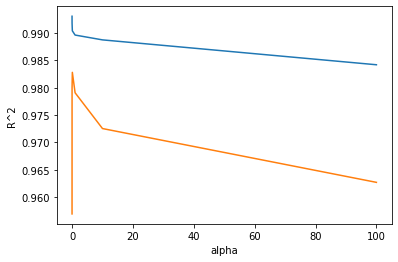

In [ ]:
plt.plot(alpha_list,train_score)
plt.plot(alpha_list,test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
#이런식으로 나온다.
#0.001, 0.01, 0.1, 1, 10, 100이니까 어떻게 보면 당연하다.

위 그래프를 보면 alpha값이 0.001부터 10배씩 늘렸기 때문에 왼쪽이 저런식으로 나온다. 여기서는 로그함수를 통해 지수를 표현해주자.

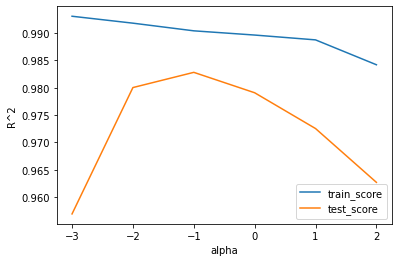

In [ ]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend(['train_score','test_score'])
plt.show()

위 그래프를 보면 alpha값이 -1일 때 가장 적절하다.

log10(x) = -1

x = 0.1이다. 즉, alpha값은 0.1

In [ ]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386926


릿지 회귀를 사용하여 훈련 세트와 테스트 세트의 점수가 비슷하게 모두 높고 과대적합과 과소적합 사이에서 균형을 맞추고 있다.

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


In [ ]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha, max_iter = 10000)
  lasso.fit(train_scaled,train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))
  print(train_score)
  print(test_score)

[0.9924957354689654]
[0.9731817502723494]
[0.9924957354689654, 0.9922988130765112]
[0.9731817502723494, 0.9761545611184548]
[0.9924957354689654, 0.9922988130765112, 0.9902080238600284]
[0.9731817502723494, 0.9761545611184548, 0.9824382983968606]
[0.9924957354689654, 0.9922988130765112, 0.9902080238600284, 0.9898116789062786]
[0.9731817502723494, 0.9761545611184548, 0.9824382983968606, 0.9801844137326112]
[0.9924957354689654, 0.9922988130765112, 0.9902080238600284, 0.9898116789062786, 0.9887624603020236]
[0.9731817502723494, 0.9761545611184548, 0.9824382983968606, 0.9801844137326112, 0.9830309645308443]
[0.9924957354689654, 0.9922988130765112, 0.9902080238600284, 0.9898116789062786, 0.9887624603020236, 0.9078618674946646]
[0.9731817502723494, 0.9761545611184548, 0.9824382983968606, 0.9801844137326112, 0.9830309645308443, 0.9090772073024512]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


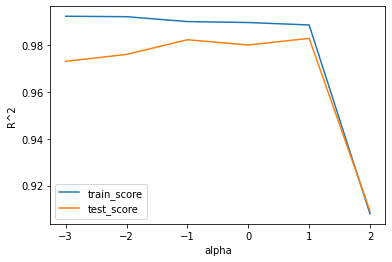

In [ ]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend(['train_score','test_score'])
plt.show()

릿지 모델과 그래프가 다르게 나왔다.

하지만 훈련 세트와 테스트 세트의 점수가 가장 좁혀지는 값의 x값은 -1 즉, alpha값은 10이 된다.

In [ ]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [ ]:
print(np.sum(lasso.coef_ == 0))

40
